---
---

> <center><font color="blue"><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"><b>Task2 <font></font> </b></h1></center>

---

### Explore Supervised Machine Learning

>In this regression task we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear regression task as it involves just two variables.

---

What will be predicted score if a student study for 9.25 hrs in a day?

---

---
---

> <center><img src="https://miro.medium.com/max/954/0*7lHSm-TrWkbxckI9.png"></center>

---
---

---

>***Supervised learning*** is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

---

> Dataset link: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

---
---

> <center><img src="https://miro.medium.com/max/1280/0*9IwCpy_JSKZMGlW0.gif"></center>

---
---

In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean

In [2]:
#read data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


---
---

> <center><font color="blue"><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"><b>EDA <font></font> </b></h1></center>


---

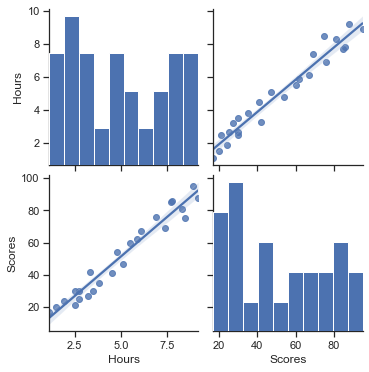

In [3]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,kind="reg")
plt.show()

In [4]:
#Helper Function for Visualization
def scatter_plot_with_correlation_line(x, y, graph_filepath):

    # Create scatter plot
    plt.scatter(x, y)

    # Add correlation line
    axes = plt.gca()
    coef = np.polyfit(x, y, 1)
    poly1d_fn = np.poly1d(coef)  # to create a linear function with coefficients
    m, b = np.polyfit(x, y, 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.title('Hours Vs Scores with Error Bars')
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    plt.plot(X_plot, m*X_plot + b, '-')
    plt.errorbar(x, poly1d_fn(x), yerr=poly1d_fn(x) - y, fmt='.k')

    # Save figure
    plt.savefig(graph_filepath, dpi=300, format='png', bbox_inches='tight')

In [5]:
#Convert dataframe to Arrays 
x = np.array(df['Hours'])
y = np.array(df['Scores'])

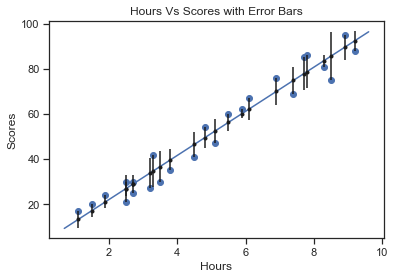

In [6]:
#plot
scatter_plot_with_correlation_line(x, y, 'scatter_plot.png')

---
---

> <center><font color="blue"><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"><b>Finding Intercept & Slope <font></font> </b></h1></center>


---

In [7]:
from scipy.stats import linregress
linregress(x, y)

LinregressResult(slope=9.775803390787473, intercept=2.4836734053731817, rvalue=0.9761906560220887, pvalue=9.132624467459331e-17, stderr=0.45294141201804755)

---
---

> <center><font color="blue"><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"><b>Building Model <font></font> </b></h1></center>


---

---

### Linear Regressor

---

In [8]:
#import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
#loading data for model
x = np.array(df['Hours']).reshape((-1, 1))
y = np.array(df['Scores'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
#training model
model_linearRegressor = LinearRegression()
model_linearRegressor.fit(X_train, y_train)

LinearRegression()

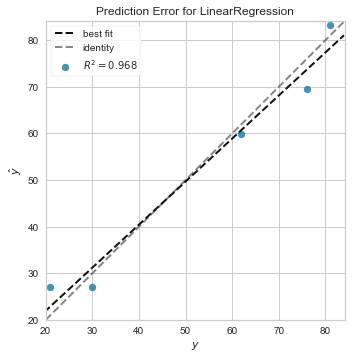

In [17]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(model_linearRegressor, X_train, y_train, X_test, y_test)

---

### Random Forest Regressor

---

model accuracy: 0.9800058081237254


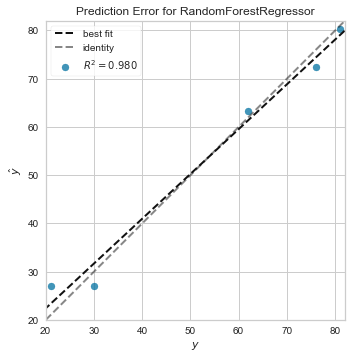

In [12]:
from sklearn.ensemble import RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor(random_state=0)
model_RandomForestRegressor.fit(X_train, y_train)
print("model accuracy:", model_RandomForestRegressor.score(X_test, y_test))
visualizer = prediction_error(model_RandomForestRegressor, X_train, y_train, X_test, y_test)

---

### Ridge Regressor

---

model accuracy: 0.9669930313719547


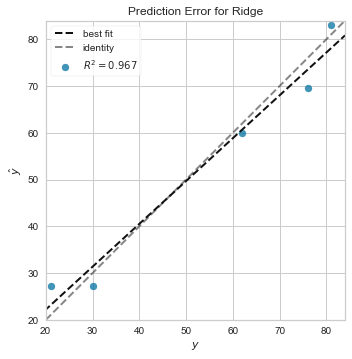

In [13]:
from sklearn.linear_model import Ridge

model_Ridge = Ridge(alpha=1.0)
model_Ridge.fit(X_train, y_train)
print("model accuracy:", model_Ridge.score(X_test, y_test))
visualizer = prediction_error(model_Ridge, X_train, y_train, X_test, y_test)

---

### RANSAC Regressor

---

model accuracy: 0.9678055545167994


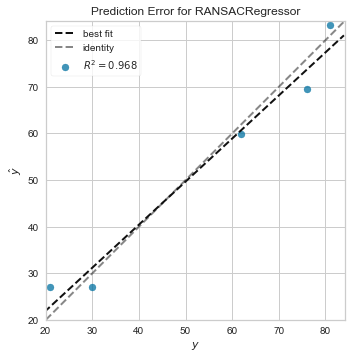

In [14]:
from sklearn.linear_model import RANSACRegressor

model_RANSACRegressor = RANSACRegressor(random_state=0)
model_RANSACRegressor.fit(X_train, y_train)
print("model accuracy:", model_RANSACRegressor.score(X_test, y_test))
visualizer = prediction_error(model_RANSACRegressor, X_train, y_train, X_test, y_test)

---
---

> <center><font color="blue"><h1 style="text-transform: uppercase; text-shadow: 1px 1px;"><b>Result<font></font> </b></h1></center>


---

In [15]:
x_pred=np.array([9.25]).reshape(-1,1)
model_RandomForestRegressor.fit(x, y)
y_pred=model_RandomForestRegressor.predict(x_pred)

In [16]:
print("Number of hours:",9.25)
print("predicted score:",y_pred[0])

Number of hours: 9.25
predicted score: 88.64


>made by Soham Mukherjee